In [1]:
from google.colab import files

uploaded = files.upload()

for file_name in uploaded.keys():
    print(f"File '{file_name}' uploaded successfully.")

Saving brent-year.csv to brent-year.csv
Saving combined_data (1).csv to combined_data (1).csv
Saving combined_data.csv to combined_data.csv
Saving crude-oil-exports.CSV to crude-oil-exports.CSV
Saving crude-oil-imports.CSV to crude-oil-imports.CSV
Saving crude-oil-production.CSV to crude-oil-production.CSV
Saving GDP.CSV to GDP.CSV
Saving Inflation.csv to Inflation.csv
Saving oil-consumption WORLD.CSV to oil-consumption WORLD.CSV
File 'brent-year.csv' uploaded successfully.
File 'combined_data (1).csv' uploaded successfully.
File 'combined_data.csv' uploaded successfully.
File 'crude-oil-exports.CSV' uploaded successfully.
File 'crude-oil-imports.CSV' uploaded successfully.
File 'crude-oil-production.CSV' uploaded successfully.
File 'GDP.CSV' uploaded successfully.
File 'Inflation.csv' uploaded successfully.
File 'oil-consumption WORLD.CSV' uploaded successfully.


In [2]:
import pandas as pd

file_names = [
    'brent-year.csv',
    'crude-oil-exports.CSV',
    'crude-oil-imports.CSV',
    'crude-oil-production.CSV',
    'GDP.CSV',
    'oil-consumption WORLD.CSV',
    'Inflation.csv'
]

data_dict = {}

for file_name in file_names:
    try:
        data = pd.read_csv(file_name)
        data_dict[file_name] = data

        print(f"File: {file_name}")
        print(data.head())
        print(f"Shape: {data.shape}")
        print("\n" + "-"*50 + "\n")
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

File: brent-year.csv
   Price  Year
0  18.53  1987
1  14.91  1988
2  18.23  1989
3  23.76  1990
4  20.04  1991
Shape: (38, 2)

--------------------------------------------------

File: crude-oil-exports.CSV
   Oil exports  Year
0   1776000000  1980
1   1550000000  1981
2   1359000000  1982
3   1300000000  1983
4   1307000000  1984
Shape: (39, 2)

--------------------------------------------------

File: crude-oil-imports.CSV
   Oil imports  Year
0   1718000000  1980
1   1530000000  1981
2   1385000000  1982
3   1321000000  1983
4   1328000000  1984
Shape: (39, 2)

--------------------------------------------------

File: crude-oil-production.CSV
   Oil production  Year
0      2924000000  1973
1      2925000000  1974
2      2762000000  1975
3      3005000000  1976
4      3129000000  1977
Shape: (48, 2)

--------------------------------------------------

File: GDP.CSV
   GDP (current US$)  Year
0       1.370000e+12  1960
1       1.450000e+12  1961
2       1.550000e+12  1962
3       1.67

In [3]:
import pandas as pd

def format_number(value):
    if value >= 1e12:
        return f"{value / 1e12:.2f}T"
    elif value >= 1e9:
        return f"{value / 1e9:.2f}B"
    elif value >= 1e6:
        return f"{value / 1e6:.2f}M"
    elif value >= 1e3:
        return f"{value / 1e3:.2f}k"
    else:
        return f"{value:.2f}"

def format_inflation(value):
    return f"{value:.2f}%"

file_names = [
    'brent-year.csv',
    'crude-oil-exports.CSV',
    'crude-oil-imports.CSV',
    'crude-oil-production.CSV',
    'GDP.CSV',
    'oil-consumption WORLD.CSV',
    'Inflation.csv'
]

data_dict = {}

for file_name in file_names:
    data = pd.read_csv(file_name)

    if 'Oil exports' in data.columns:
        data.rename(columns={'Oil exports': 'Oil exports (m³)'}, inplace=True)
    if 'Oil imports' in data.columns:
        data.rename(columns={'Oil imports': 'Oil imports (m³)'}, inplace=True)
    if 'Oil production' in data.columns:
        data.rename(columns={'Oil production': 'Oil production (m³)'}, inplace=True)

    if 'Inflation' in data.columns:
        data.rename(columns={'Inflation': 'Inflation (%)'}, inplace=True)

    for column in data.columns:
        if column not in ['Year', 'Price']:
            if column == 'Inflation (%)':
                data[column] = data[column].apply(format_inflation)
            else:
                data[column] = data[column].apply(format_number)

    data_dict[file_name] = data

combined_data = None
for file_name, data in data_dict.items():
    if combined_data is None:
        combined_data = data
    else:
        combined_data = pd.merge(combined_data, data, on='Year', how='inner')

column_order = ['Year'] + [col for col in combined_data.columns if col != 'Year']
combined_data = combined_data[column_order]
combined_data = combined_data.sort_values(by='Year').reset_index(drop=True)
print(combined_data.head())

   Year  Price Oil exports (m³) Oil imports (m³) Oil production (m³)  \
0  1987  18.53            1.34B            1.43B               3.29B   
1  1988  14.91            1.44B            1.51B               3.41B   
2  1989  18.23            1.51B            1.59B               3.47B   
3  1990  23.76            1.59B            1.64B               3.51B   
4  1991  20.04            1.60B            1.62B               3.49B   

  GDP (current US$) Oil consumption - TWh Inflation (%)  
0            17.50T                35.51k         5.71%  
1            19.50T                36.63k         7.11%  
2            20.40T                37.21k         6.92%  
3            23.00T                37.61k         8.06%  
4            23.90T                37.69k         9.00%  


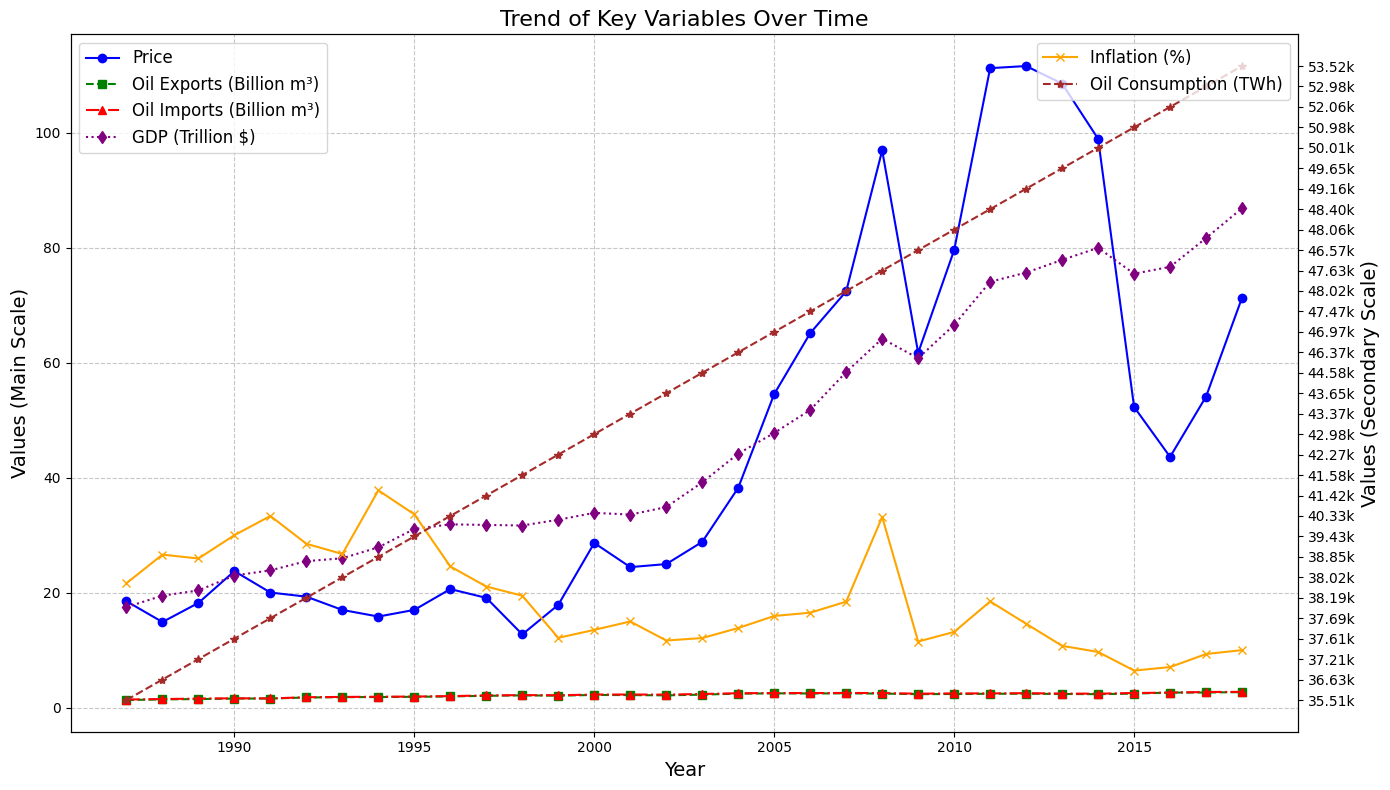

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(combined_data['Year'], combined_data['Price'], label='Price', marker='o', linestyle='-', color='blue')
ax1.plot(combined_data['Year'], combined_data['Oil exports (m³)'].apply(lambda x: float(x.replace('B', '')) if 'B' in x else float(x.replace('M', '')) / 1000),
         label='Oil Exports (Billion m³)', marker='s', linestyle='--', color='green')
ax1.plot(combined_data['Year'], combined_data['Oil imports (m³)'].apply(lambda x: float(x.replace('B', '')) if 'B' in x else float(x.replace('M', '')) / 1000),
         label='Oil Imports (Billion m³)', marker='^', linestyle='-.', color='red')
ax1.plot(combined_data['Year'], combined_data['GDP (current US$)'].apply(lambda x: float(x.replace('T', ''))),
         label='GDP (Trillion $)', marker='d', linestyle=':', color='purple')
ax1.set_title('Trend of Key Variables Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Values (Main Scale)', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax2 = ax1.twinx()
ax2.plot(combined_data['Year'], combined_data['Inflation (%)'].apply(lambda x: float(x.replace('%', ''))),
         label='Inflation (%)', marker='x', linestyle='-', color='orange')
ax2.plot(combined_data['Year'], combined_data['Oil consumption - TWh'],
         label='Oil Consumption (TWh)', marker='*', linestyle='--', color='brown')
ax2.set_ylabel('Values (Secondary Scale)', fontsize=14)
ax2.legend(loc='upper right', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

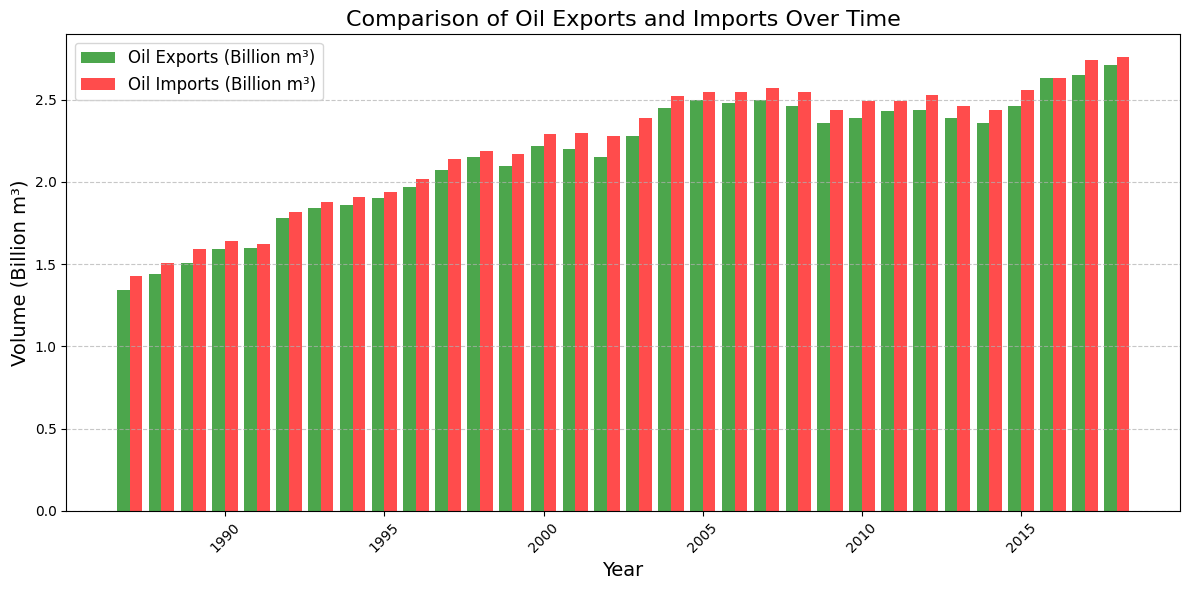

In [7]:
plt.figure(figsize=(12, 6))

plt.bar(combined_data['Year'] - 0.2,
        combined_data['Oil exports (m³)'].apply(lambda x: float(x.replace('B', '')) if 'B' in x else float(x.replace('M', '')) / 1000),
        width=0.4, label='Oil Exports (Billion m³)', color='green', alpha=0.7)

plt.bar(combined_data['Year'] + 0.2,
        combined_data['Oil imports (m³)'].apply(lambda x: float(x.replace('B', '')) if 'B' in x else float(x.replace('M', '')) / 1000),
        width=0.4, label='Oil Imports (Billion m³)', color='red', alpha=0.7)

plt.title('Comparison of Oil Exports and Imports Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Volume (Billion m³)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

ماتریس همبستگی:
                          Price  Oil production (m³)  GDP (current US$)  \
Price                  1.000000             0.744987           0.851862   
Oil production (m³)    0.744987             1.000000           0.954812   
GDP (current US$)      0.851862             0.954812           1.000000   
Oil consumption - TWh  0.758501             0.996065           0.958448   
Inflation (%)         -0.394764            -0.744581          -0.638166   

                       Oil consumption - TWh  Inflation (%)  
Price                               0.758501      -0.394764  
Oil production (m³)                 0.996065      -0.744581  
GDP (current US$)                   0.958448      -0.638166  
Oil consumption - TWh               1.000000      -0.740035  
Inflation (%)                      -0.740035       1.000000  


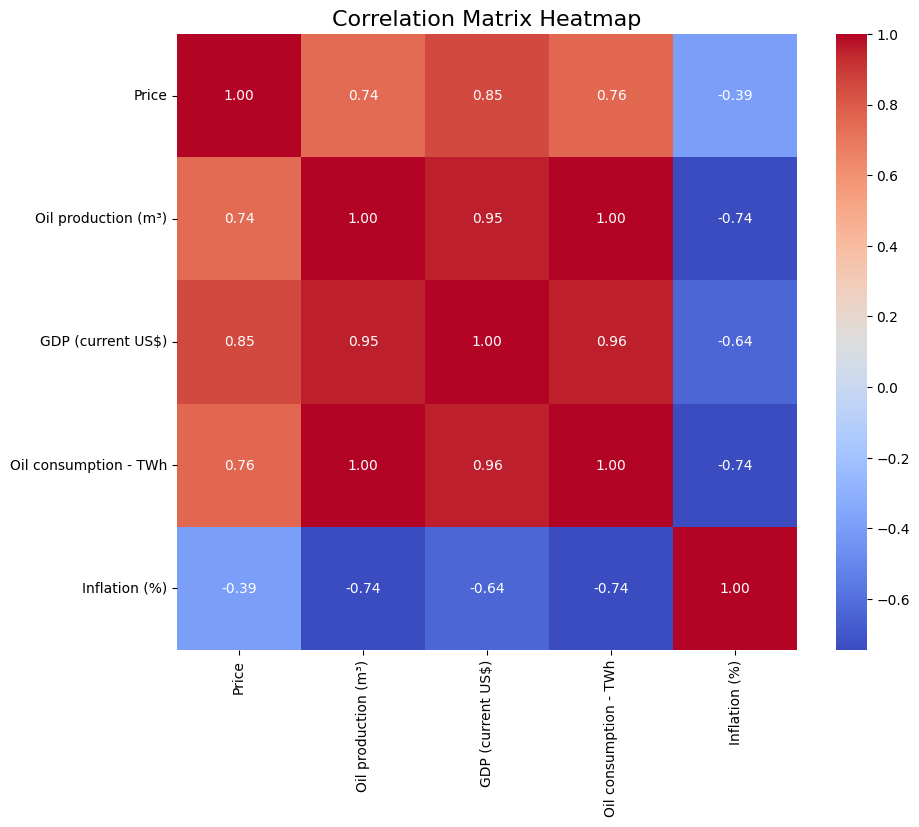

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def convert_to_numeric(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace('B', '')) * 1e9
        elif 'T' in value:
            return float(value.replace('T', '')) * 1e12
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif '%' in value:
            return float(value.replace('%', ''))
        else:
            return float(value)
    return value

numeric_columns = ['Price', 'Oil production (m³)', 'GDP (current US$)', 'Oil consumption - TWh', 'Inflation (%)']
for col in numeric_columns:
    combined_data[col] = combined_data[col].apply(convert_to_numeric)

correlation_matrix = combined_data[numeric_columns].corr()

print("ماتریس همبستگی:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

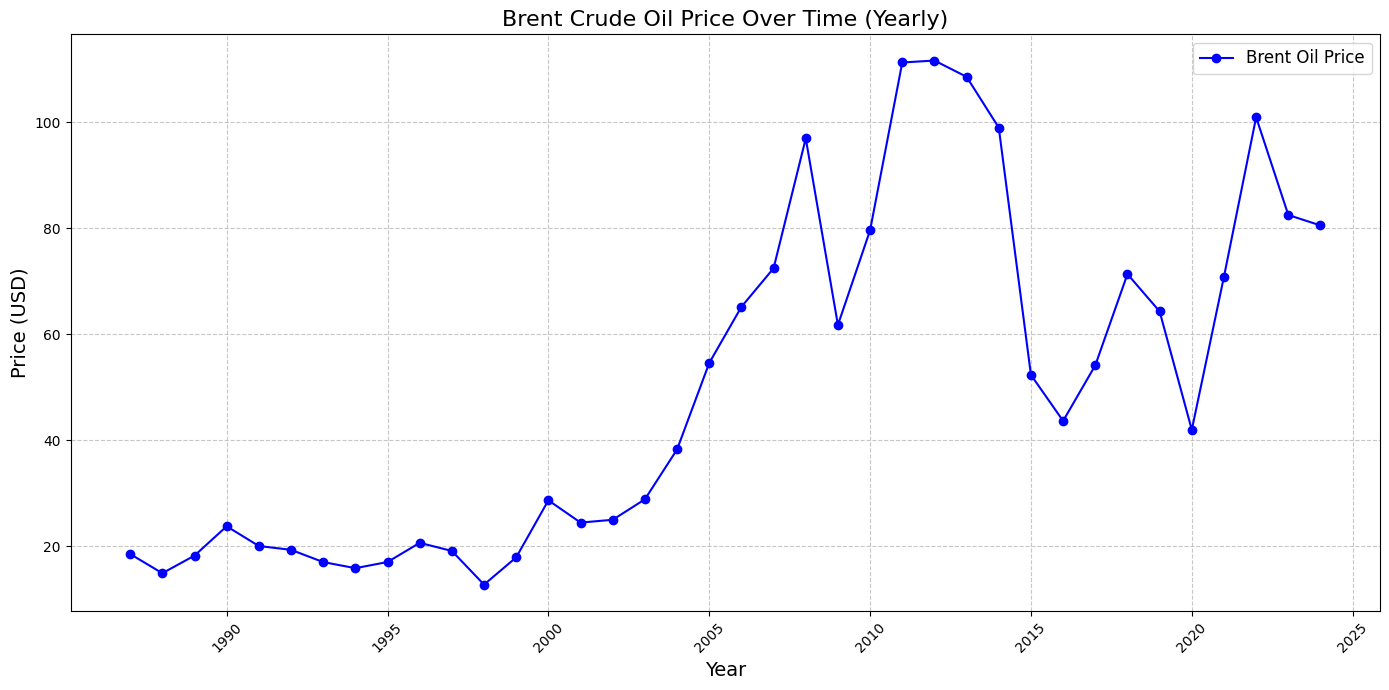

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'brent-year.csv'
data = pd.read_csv(file_path)

data['Year'] = data['Year'].astype(int)

data = data.sort_values(by='Year')

plt.figure(figsize=(14, 7))
plt.plot(data['Year'], data['Price'], label='Brent Oil Price', color='blue', marker='o')

plt.title('Brent Crude Oil Price Over Time (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

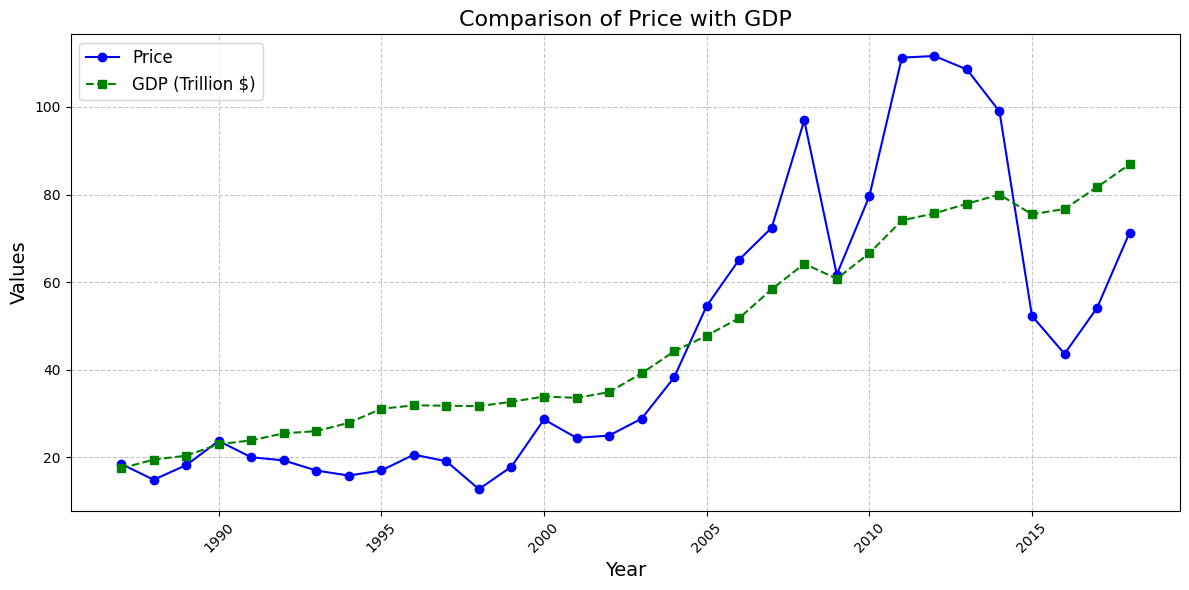

In [12]:
import matplotlib.pyplot as plt

combined_data['GDP (Trillion $)'] = combined_data['GDP (current US$)'].apply(
    lambda x: float(str(x).replace('T', '')) if isinstance(x, str) else x
)
combined_data['GDP (Trillion $)'] = combined_data['GDP (Trillion $)'] / 1e12

plt.figure(figsize=(12, 6))

plt.plot(combined_data['Year'], combined_data['Price'], label='Price', marker='o', linestyle='-', color='blue')
plt.plot(combined_data['Year'], combined_data['GDP (Trillion $)'],
         label='GDP (Trillion $)', marker='s', linestyle='--', color='green')

plt.title('Comparison of Price with GDP', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
combined_data.to_csv('combined_data.csv', index=False, encoding='utf-8')

داده‌های ترکیبی:
             Price  GDP (current US$)
Year                                
1987-01-01  18.53       1.750000e+13
1988-01-01  14.91       1.950000e+13
1989-01-01  18.23       2.040000e+13
1990-01-01  23.76       2.300000e+13
1991-01-01  20.04       2.390000e+13


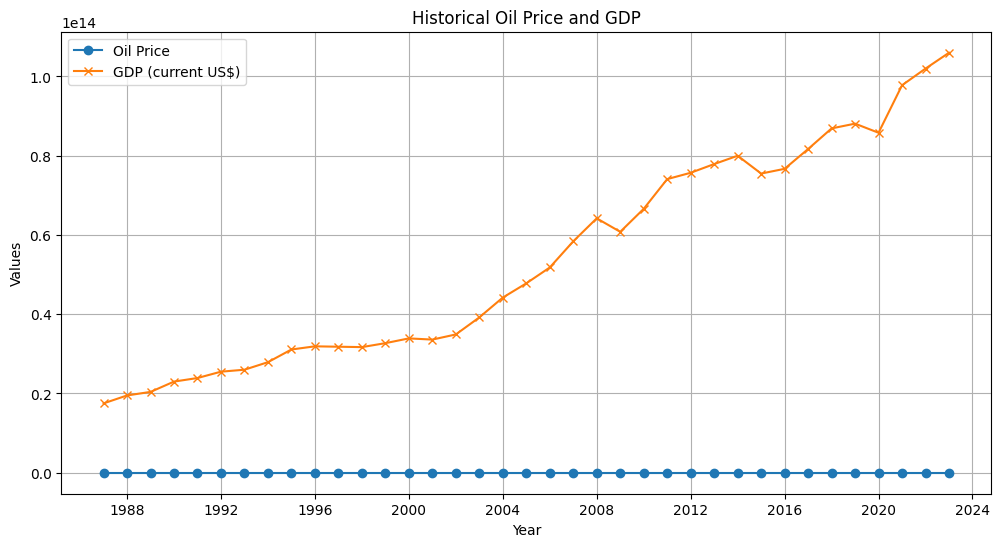

ضریب و شیب مدل خطی GDP: [2.43869132e+12] -4835886913229017.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


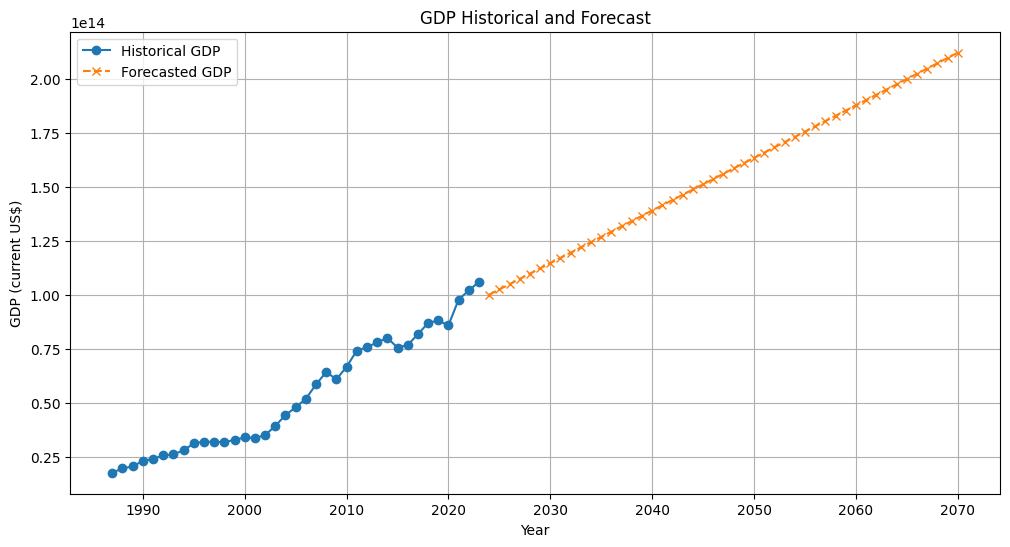

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -138.961
Date:                Fri, 25 Apr 2025   AIC                            285.922
Time:                        14:02:35   BIC                            292.256
Sample:                    01-01-1987   HQIC                           288.132
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GDP (current US$)  2.888e-12   4.92e-13      5.874      0.000    1.92e-12    3.85e-12
ar.L1                      0    6.3e-25          0      1.000   -1.23e-24    1.23e-24
ma.L1                   

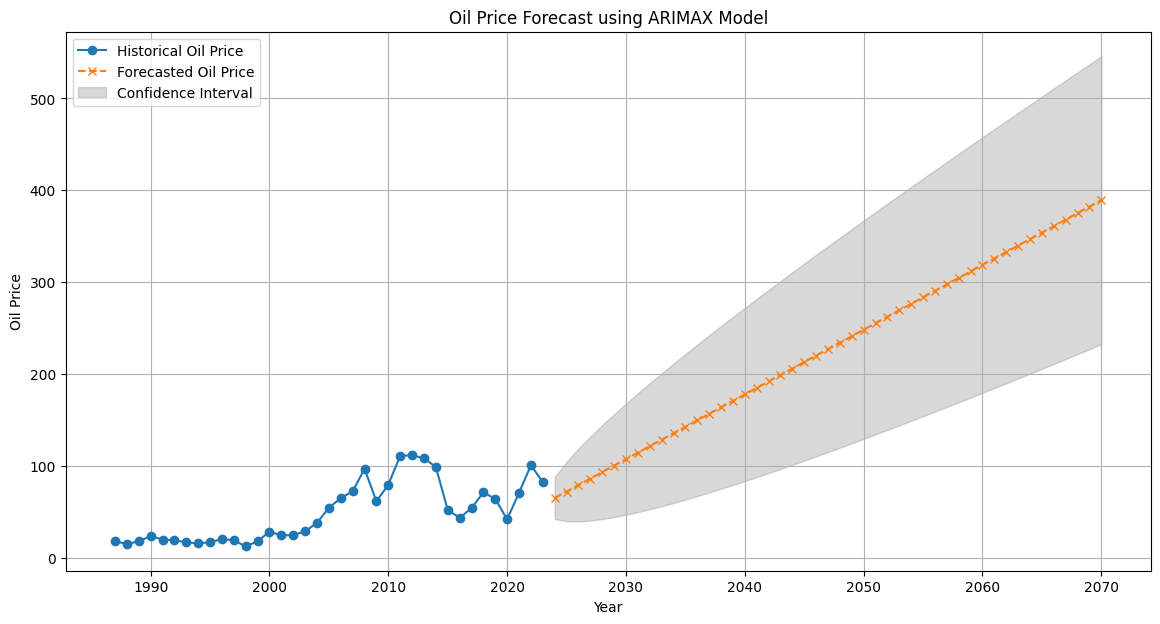

Oil Price Forecast from 2024 to 2070
            Price_forecast    Lower CI    Upper CI
2024-01-01       65.231859   42.371561   88.092157
2025-01-01       72.274959   39.945615  104.604302
2026-01-01       79.318058   39.722861  118.913256
2027-01-01       86.361158   40.640562  132.081754
2028-01-01       93.404257   42.287077  144.521437
2029-01-01      100.447357   44.451291  156.443422
2030-01-01      107.490456   47.007793  167.973119
2031-01-01      114.533555   49.874868  179.192242
2032-01-01      121.576655   52.995761  190.157549
2033-01-01      128.619754   56.329145  200.910364
2034-01-01      135.662854   59.843823  211.481885
2035-01-01      142.705953   63.515558  221.896348
2036-01-01      149.749053   67.325076  232.173029
2037-01-01      156.792152   71.256749  242.327555
2038-01-01      163.835252   75.297698  252.372805
2039-01-01      170.878351   79.437159  262.319543
2040-01-01      177.921450   83.666027  272.176874
2041-01-01      184.964550   87.976519  281.9

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from datetime import datetime

oil_df = pd.read_csv('brent-year.csv')
gdp_df = pd.read_csv('GDP.CSV')

oil_df['Year'] = pd.to_datetime(oil_df['Year'], format='%Y')
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format='%Y')

data = pd.merge(oil_df, gdp_df, on='Year', how='inner')
data.sort_values('Year', inplace=True)

data.set_index('Year', inplace=True)

print("داده‌های ترکیبی:\n", data.head())

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Price'], marker='o', label='Oil Price')
plt.plot(data.index, data['GDP (current US$)'], marker='x', label='GDP (current US$)')
plt.title('Historical Oil Price and GDP')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

data['Year_int'] = data.index.year
X = data[['Year_int']]
y = data['GDP (current US$)']

lr_model = LinearRegression()
lr_model.fit(X, y)

print("ضریب و شیب مدل خطی GDP:", lr_model.coef_, lr_model.intercept_)

last_year = data.index.year.max()
future_years = np.arange(last_year + 1, 2071)
future_years_int = future_years.reshape(-1, 1)
gdp_future_pred = lr_model.predict(future_years_int)

future_gdp_df = pd.DataFrame({
    'Year': pd.to_datetime(future_years, format='%Y'),
    'GDP (current US$)': gdp_future_pred
})
future_gdp_df.set_index('Year', inplace=True)
plt.figure(figsize=(12,6))
plt.plot(data.index, data['GDP (current US$)'], label='Historical GDP', marker='o')
plt.plot(future_gdp_df.index, future_gdp_df['GDP (current US$)'], label='Forecasted GDP', marker='x', linestyle='--')
plt.title('GDP Historical and Forecast')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.grid(True)
plt.show()

exog = data[['GDP (current US$)']]

model_oil = ARIMA(data['Price'], order=(1,1,1), exog=exog)
model_oil_fit = model_oil.fit()
print(model_oil_fit.summary())

exog_future = future_gdp_df[['GDP (current US$)']]

steps = len(future_years)

forecast_res = model_oil_fit.get_forecast(steps=steps, exog=exog_future)
forecast_oil = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

forecast_years = pd.to_datetime(future_years, format='%Y')
forecast_df = pd.DataFrame({
    'Price_forecast': forecast_oil,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
}, index=forecast_years)

plt.figure(figsize=(14,7))
plt.plot(data.index, data['Price'], label='Historical Oil Price', marker='o')
plt.plot(forecast_df.index, forecast_df['Price_forecast'], label='Forecasted Oil Price', marker='x', linestyle='--')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('Oil Price Forecast using ARIMAX Model')
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()

print("Oil Price Forecast from", future_years[0], "to", future_years[-1])
print(forecast_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

<ipython-input-16-246efa9d3bd7>:107: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=str(last_year + 1), periods=n_future, freq='Y')


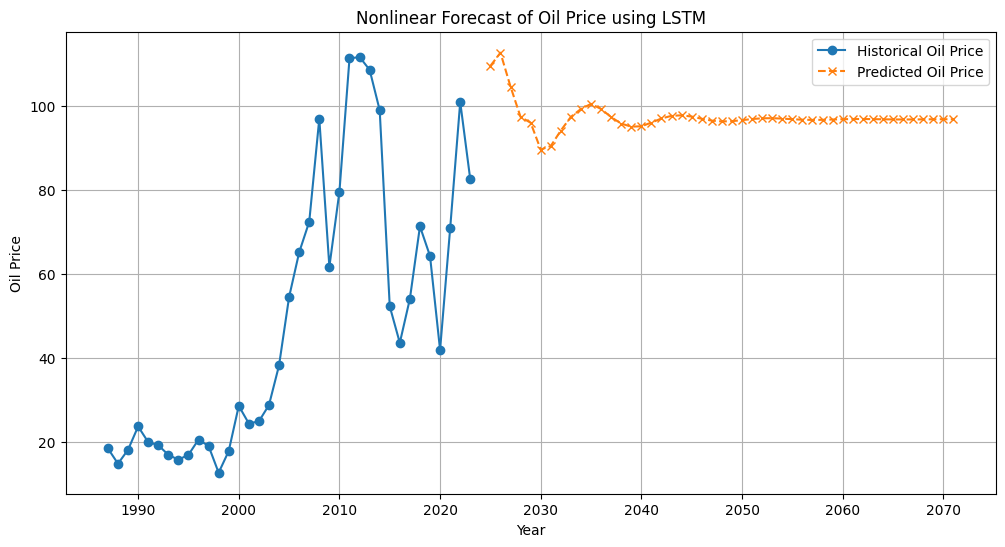

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


oil_df = pd.read_csv('brent-year.csv')
gdp_df = pd.read_csv('GDP.CSV')
oil_df['Year'] = pd.to_datetime(oil_df['Year'], format='%Y')
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format='%Y')

data = pd.merge(oil_df, gdp_df, on='Year', how='inner')
data.sort_values('Year', inplace=True)
data.set_index('Year', inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

window_size = 5

def create_sequences(df, window_size):
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i+window_size].values)
        y.append(df.iloc[i+window_size]['Price'])

X, y = create_sequences(scaled_df, window_size)

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(window_size, X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test), verbose=0)


n_future = 2070 - data.index.year.max()
last_window = scaled_df[-window_size:].values
predictions = []
current_window = last_window.copy()

for i in range(n_future):
    current_window_reshaped = current_window.reshape(1, window_size, X.shape[2])
    pred = model.predict(current_window_reshaped)
    predictions.append(pred[0, 0])

    last_gdp = scaled_df.iloc[-1]['GDP (current US$)']
    new_row = current_window[-1].copy()
    new_row[0] = pred[0, 0]
    new_row[1] = last_gdp
    current_window = np.vstack([current_window[1:], new_row])

price_min = scaler.data_min_[0]
price_max = scaler.data_max_[0]
predicted_prices = [p * (price_max - price_min) + price_min for p in predictions]
last_year = data.index.year.max()
future_years = pd.date_range(start=str(last_year + 1), periods=n_future, freq='Y')
forecast_df = pd.DataFrame({
    'Predicted_Oil_Price': predicted_prices
}, index=future_years)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Price'], label='Historical Oil Price', marker='o')
plt.plot(forecast_df.index, forecast_df['Predicted_Oil_Price'], label='Predicted Oil Price', marker='x', linestyle='--')
plt.title('Nonlinear Forecast of Oil Price using LSTM')
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

<ipython-input-17-03d97920d7a0>:80: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=str(last_year + 1), periods=n_future, freq='Y')


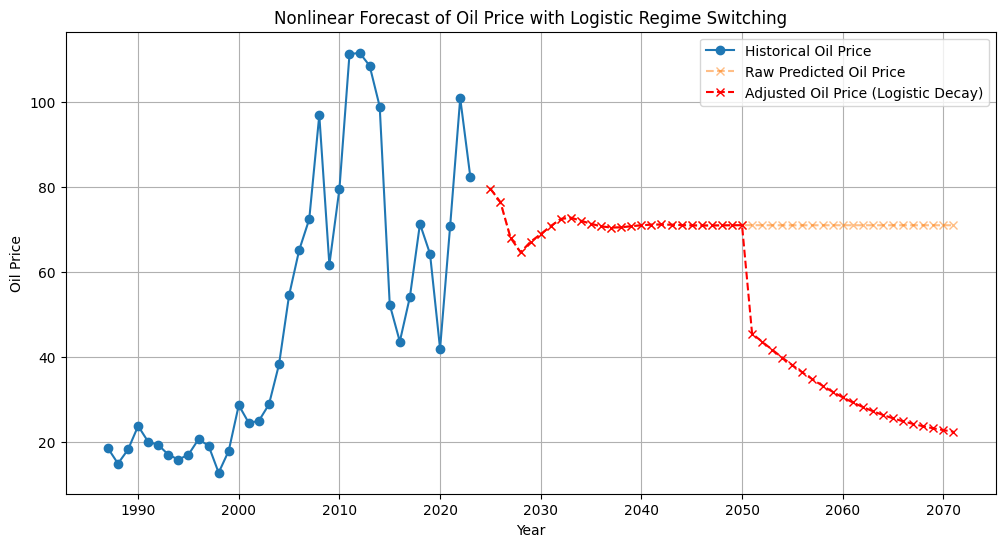

Final Forecast (Logistic Adjustment) from 2024 to 2070
            Adjusted_Oil_Price_Logistic
2024-12-31                    79.615927
2025-12-31                    76.453854
2026-12-31                    68.090928
2027-12-31                    64.649198
2028-12-31                    67.141194
2029-12-31                    68.918174
2030-12-31                    70.817547
2031-12-31                    72.506012
2032-12-31                    72.793937
2033-12-31                    72.075054
2034-12-31                    71.352311
2035-12-31                    70.763089
2036-12-31                    70.469105
2037-12-31                    70.536734
2038-12-31                    70.786284
2039-12-31                    71.017400
2040-12-31                    71.161381
2041-12-31                    71.193557
2042-12-31                    71.138386
2043-12-31                    71.055169
2044-12-31                    70.991217
2045-12-31                    70.963071
2046-12-31               

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import math

oil_df = pd.read_csv('brent-year.csv')
gdp_df = pd.read_csv('GDP.CSV')

oil_df['Year'] = pd.to_datetime(oil_df['Year'], format='%Y')
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format='%Y')

data = pd.merge(oil_df, gdp_df, on='Year', how='inner')
data.sort_values('Year', inplace=True)
data.set_index('Year', inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

window_size = 5

def create_sequences(df, window_size):
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i+window_size].values)
        y.append(df.iloc[i+window_size]['Price'])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_df, window_size)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(window_size, X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test), verbose=0)
n_future = 2070 - data.index.year.max()
last_window = scaled_df[-window_size:].values
predictions = []
current_window = last_window.copy()

for i in range(n_future):
    current_window_reshaped = current_window.reshape(1, window_size, X.shape[2])
    pred = model.predict(current_window_reshaped)
    predictions.append(pred[0, 0])
    last_gdp = scaled_df.iloc[-1]['GDP (current US$)']
    new_row = current_window[-1].copy()
    new_row[0] = pred[0, 0]
    new_row[1] = last_gdp
    current_window = np.vstack([current_window[1:], new_row])

price_min = scaler.data_min_[0]
price_max = scaler.data_max_[0]
raw_predicted_prices = [p * (price_max - price_min) + price_min for p in predictions]

last_year = data.index.year.max()
future_years = pd.date_range(start=str(last_year + 1), periods=n_future, freq='Y')
forecast_df = pd.DataFrame({
    'Raw_Predicted_Oil_Price': raw_predicted_prices
}, index=future_years)

floor_price = 20
threshold_year = 2050
alpha = 0.15

adjusted_prices = []
for year, raw_price in zip(forecast_df.index, forecast_df['Raw_Predicted_Oil_Price']):
    if year.year >= threshold_year:
        factor = 1 / (1 + np.exp(alpha * (year.year - threshold_year)))
        adjusted_price = floor_price + (raw_price - floor_price) * factor
    else:
        adjusted_price = raw_price
    adjusted_prices.append(adjusted_price)

forecast_df['Adjusted_Oil_Price_Logistic'] = adjusted_prices

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Price'], label='Historical Oil Price', marker='o')
plt.plot(forecast_df.index, forecast_df['Raw_Predicted_Oil_Price'], label='Raw Predicted Oil Price', marker='x', linestyle='--', alpha=0.5)
plt.plot(forecast_df.index, forecast_df['Adjusted_Oil_Price_Logistic'], label='Adjusted Oil Price (Logistic Decay)', marker='x', linestyle='--', color='red')
plt.title('Nonlinear Forecast of Oil Price with Logistic Regime Switching')
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()

print("Final Forecast (Logistic Adjustment) from", future_years[0].year, "to", future_years[-1].year)
print(forecast_df[['Adjusted_Oil_Price_Logistic']])


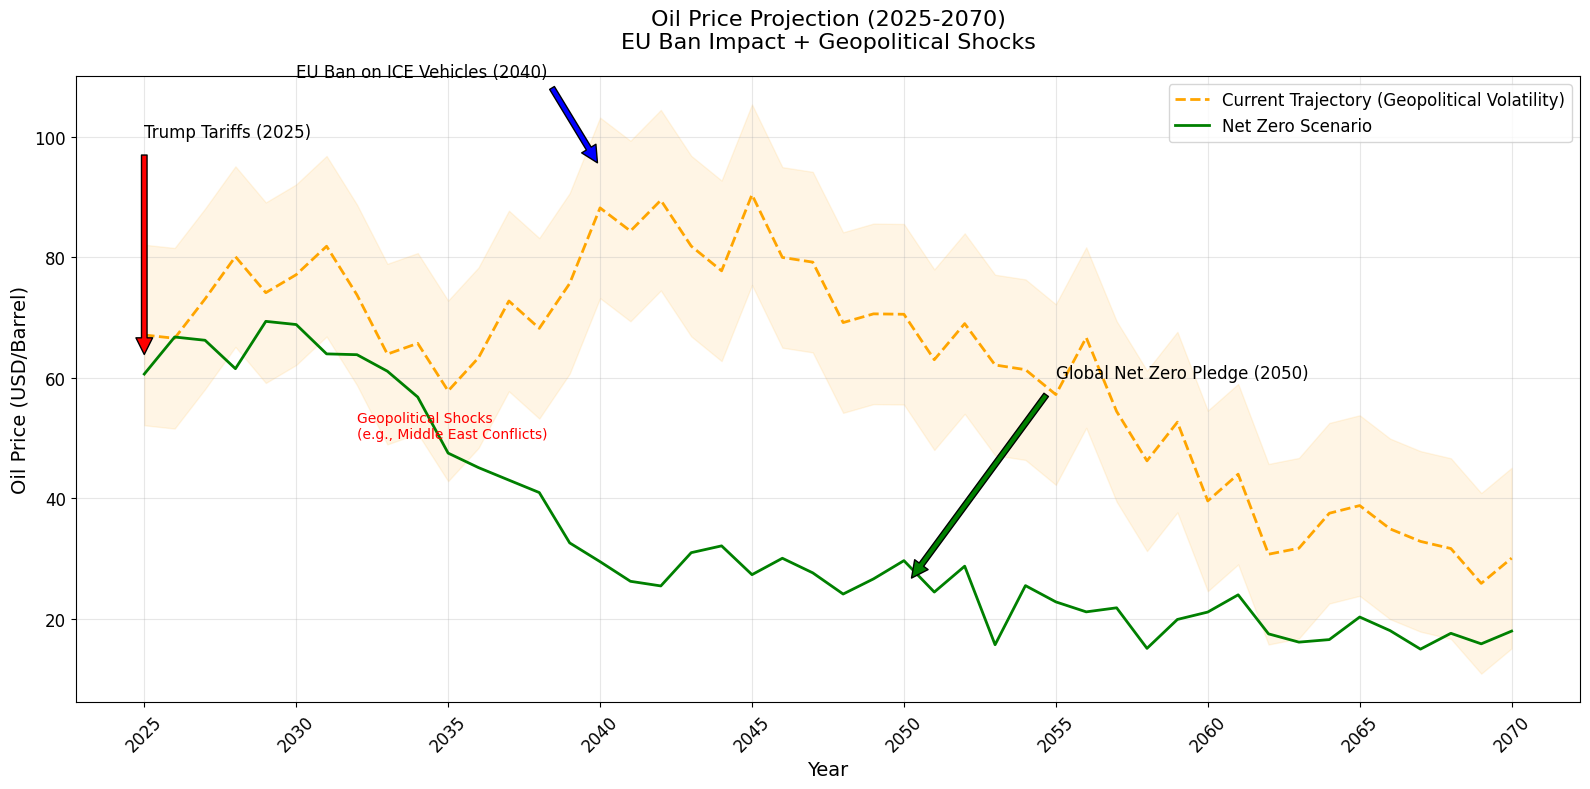

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

years = np.arange(2025, 2071)
np.random.seed(42)

current_traj = np.interp(years, [2025, 2030, 2035, 2040, 2050, 2070], [62, 85, 70, 95, 60, 40])
current_traj += np.sin(years * 0.2) * 10
current_traj += np.random.normal(0, 5, len(years))

net_zero = np.interp(years, [2025, 2030, 2035, 2040, 2070], [62, 70, 50, 30, 15])
net_zero += np.random.normal(0, 3, len(years))

df = pd.DataFrame({
    'Year': years,
    'Current Trajectory': current_traj,
    'Net Zero': net_zero
})

plt.figure(figsize=(16, 8))
plt.plot(df['Year'], df['Current Trajectory'], label='Current Trajectory (Geopolitical Volatility)', color='orange', linestyle='--', linewidth=2)
plt.plot(df['Year'], df['Net Zero'], label='Net Zero Scenario', color='green', linestyle='-', linewidth=2)

plt.title('Oil Price Projection (2025-2070)\nEU Ban Impact + Geopolitical Shocks', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Oil Price (USD/Barrel)', fontsize=14)
plt.xticks(np.arange(2025, 2071, 5), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.annotate('Trump Tariffs (2025)', xy=(2025, 62), xytext=(2025, 100),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)
plt.annotate('EU Ban on ICE Vehicles (2040)', xy=(2040, 95), xytext=(2030, 110),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12)
plt.annotate('Global Net Zero Pledge (2050)', xy=(2050, 25), xytext=(2055, 60),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12)

plt.fill_between(years, df['Current Trajectory'] - 15, df['Current Trajectory'] + 15, color='orange', alpha=0.1)
plt.text(2032, 50, 'Geopolitical Shocks\n(e.g., Middle East Conflicts)', fontsize=10, color='red')

plt.tight_layout()
plt.show()